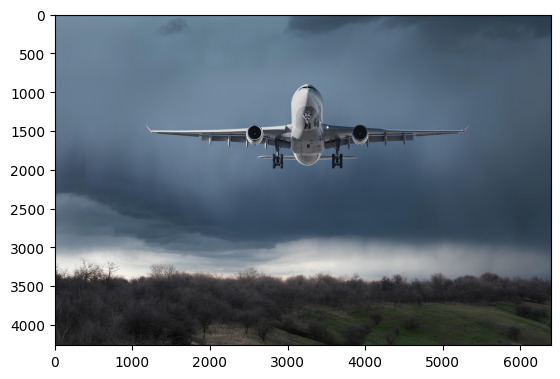

In [265]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('acidente_mendonca.jpeg'))

## Agrupa acidentes aeronáuticos em clusters definidos pelo modelo

Os dados utilizados nesse projeto foram analisados, limpos e tratados no projeto:
https://github.com/jairobernardesjunior/Cenipa_limpa_trata_armazena

São dados disponibilizados pelo Cenipa-Centro de Investigação e Prevenção de Acidentes Aeronáuticos da Força Aérea Brasileira.

## Faz o reconhecimento dos dados para selecionar as variáveis que vão ser incluidas na clusterização de acidentes aeronáuticos.

In [266]:
# importando bibliotecas
from sklearn.preprocessing import (
    OneHotEncoder, # transforma dados categóricos em colunas e valores binário 0-1
    StandardScaler, # faz a padronização dos dados para melhorar a normalidade
    MinMaxScaler, # transforma os valores dentro de uma escala entre 0 e 1 e melhora a normalidade
    PowerTransformer, # transforma os valores para melhorar a normalidade
)
from sklearn.compose import ColumnTransformer

from scipy.stats import skew 
from scipy.stats import kurtosis 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

Essas são as bibliotecas utilizadas nessa primeira fase de reconhecimento e análise dos dados algumas estão inibidas porque foram utilizadas para ver se o resultado seria mais interessante para a padronização dos dados, foram deixadas aqui por haver necessidade futura de serem utilizadas como melhor resultado.

---

In [267]:
# carregando arquivo de acidentes aeronáuticos fornecidos pela cenipa em dataframe
df_acidentes_aero = pd.read_csv('arquivos/df_acidentes_aeronauticos.csv')

In [268]:
# verificando o tamanho do arquivo conferindo a quantidade de linha(registros) e colunas(varáveis)
df_acidentes_aero.shape

(9819, 45)

In [269]:
# reconhecendo as variáveis disponíveis
df_acidentes_aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              9819 non-null   float64
 11  ocorrencia_longitude             9819 non-null   float64
 12  aeronave_matricula  

- Verifica-se a quantidade e os nomes das variáveis(colunas) existente no dataframe
- Verifica-se se existe algum nulo em alguma linha do dataframe
- Verifica-se o tipo de variáveis existentes no dataframe

---

In [270]:
# confirmando a inexistência de nulos
df_acidentes_aero.isnull().sum()

ocorrencia_classificacao              0
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_pais                       0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       0
investigacao_status                1414
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_latitude                   0
ocorrencia_longitude                  0
aeronave_matricula                    0
aeronave_tipo_veiculo                 0
aeronave_fabricante                   0
aeronave_modelo                       0
aeronave_tipo_icao                    1
aeronave_motor_tipo                   0
aeronave_motor_quantidade             0
aeronave_pmd                          0
aeronave_pmd_categoria                0
aeronave_assentos                     0
aeronave_ano_fabricacao               0
aeronave_pais_fabricante              0
aeronave_pais_registro                0


- No .info() anterior percebemos que a coluna investigação status apresenta 8405 linhas que não tem nulos de um total de 9819 linhas, existindo 1414 linhas com o campo(variável) investigacao_status nulo.
- Temos também uma linha com o campo aeronave_tipo_icao nulo
- Essas variáveis-colunas serão ignoradas mais a frente quando copiarmos somente as colunas que nos interessa para a confecção desse trabalho

---

In [271]:
# verificando se existe linhas duplicadas, linhas idênticas o que poderia atrapalhar na performance
# e também no algorítimo do modelo
# não foi encontrado nenhuma linha duplicada

df_acidentes_aero.duplicated().sum()

0

In [272]:
# checando mais uma vez a dimensão do dataframe
# temos um df com 9819 linhas(registros) e 45 colunas(campos - variáveis)

df_acidentes_aero.shape

(9819, 45)

In [273]:
# verificando o conteúdo das variáveis
# faz o primeiro reconhecimento do conteúdo das variáveis
# vemos que existem várias variáveis categóricas e numéricas, vamos verificar cada uma
# para ver se há possibilidade de usarmos em nosso estudo

df_acidentes_aero.head(2)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,NaN,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-16 21:10:00,NaN,1,NÃO,0.0,0.0,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00


In [274]:
# selecionando somente colunas(variáveis) numéricas
# com essas variáveis plotaremos histogramas para verificar a normalidade da distribuição
# conferindo se podemos utilizar ou não em nosso trabalho de clusterização

df_number = df_acidentes_aero.select_dtypes(include="number").columns
print(len(df_number))
print(df_number)

8
Index(['total_aeronaves_envolvidas', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'aeronave_pmd', 'aeronave_pmd_categoria',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_fatalidades_total'],
      dtype='object')


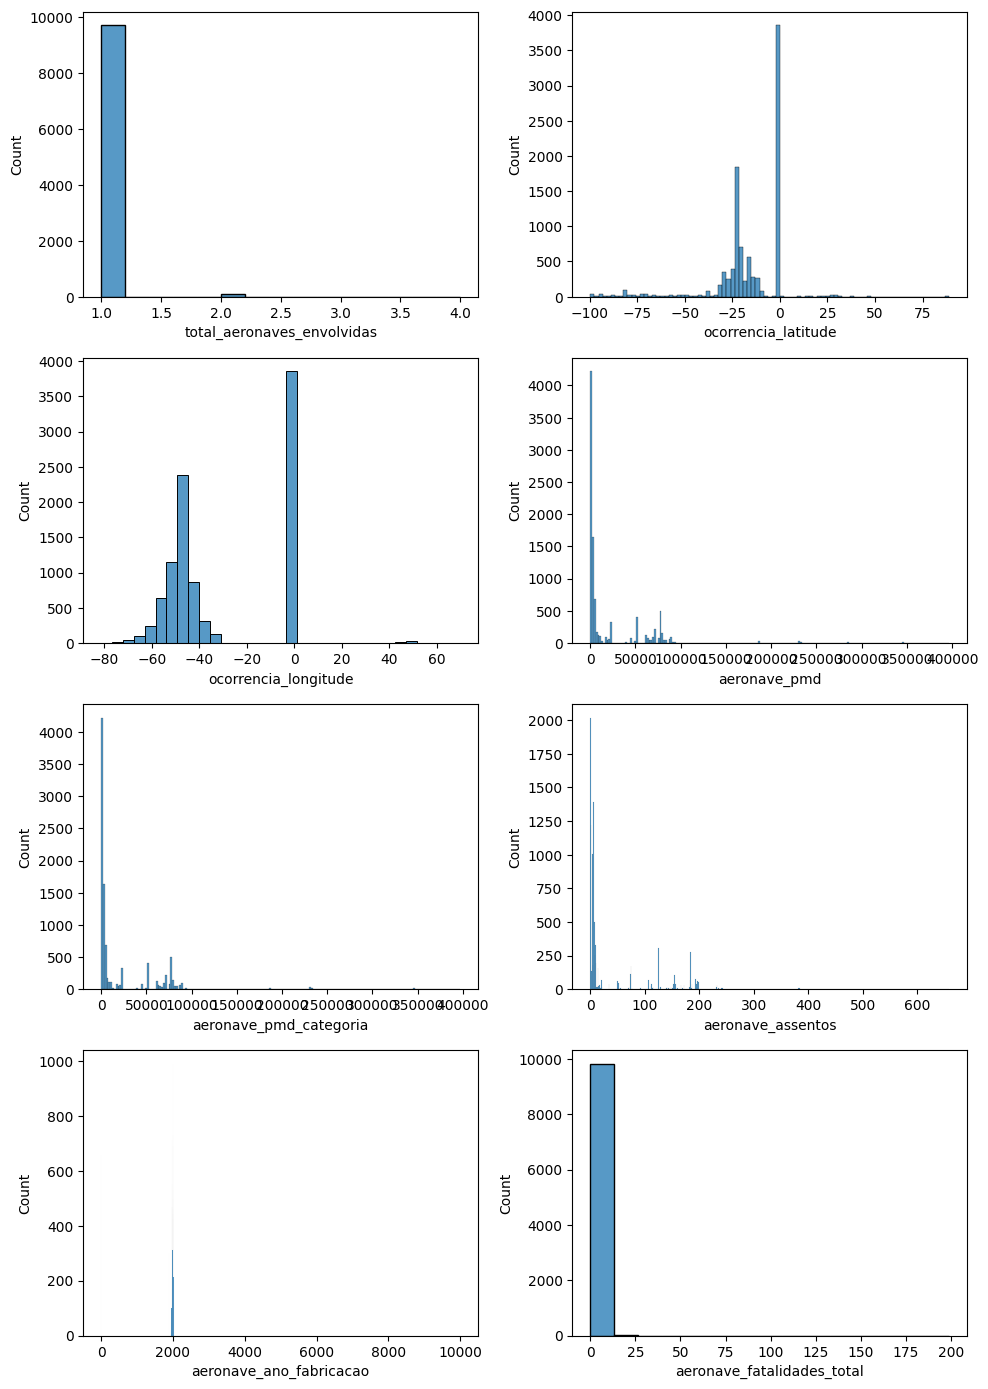

In [275]:
# plotando histogramas de variáveis numéricas
# agora com o data frame que possui somente variáveis numéricas vamos plotar os histogramas dessas variáveis
# para verificar se a distribuição está normalizada

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), df_number):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero)

plt.show()

- Inicialmente vamos escolher 4 variáveis numéricas por apresentarem uma melhor distribuição normal avaliadas inicialmente, sendo que, passarão por transformações para melhorar a distribuição normal e serem aprovadas para a utilização na clusterização de acidentes aeronáuticos, as variáveis são: 'ocorrencia_latitude', 'ocorrencia_longitude',  
 'aeronave_pmd', 'aeronave_assentos'.

---

In [276]:
# listando a primeira linha para servir de referência para montar a lista de variáveis que vão compor
# e participar de nosso estudo e geração de clusters

df_acidentes_aero.head(1)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,NaN,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00


In [277]:
# escolhendo as colunas-variáveis categóricas
print(  'ocorrencia_classificacao', df_acidentes_aero['ocorrencia_classificacao'].value_counts() )
print('')
print(  'ocorrencia_saida_pista', df_acidentes_aero['ocorrencia_saida_pista'].value_counts() ) 
print('')
print(  'aeronave_tipo_veiculo', df_acidentes_aero['aeronave_tipo_veiculo'].value_counts() )
print('')
print(  'aeronave_motor_tipo', df_acidentes_aero['aeronave_motor_tipo'].value_counts() )
print('')
print(  'aeronave_motor_quantidade', df_acidentes_aero['aeronave_motor_quantidade'].value_counts() )
print('')
print(  'aeronave_tipo_operacao', df_acidentes_aero['aeronave_tipo_operacao'].value_counts() )
print('')
print(  'aeronave_nivel_dano', df_acidentes_aero['aeronave_nivel_dano'].value_counts() )
print('')
print(  'periodo', df_acidentes_aero['periodo'].value_counts() )      

ocorrencia_classificacao ocorrencia_classificacao
INCIDENTE          6160
ACIDENTE           2601
INCIDENTE GRAVE    1058
Name: count, dtype: int64

ocorrencia_saida_pista ocorrencia_saida_pista
NÃO    9062
SIM     757
Name: count, dtype: int64

aeronave_tipo_veiculo aeronave_tipo_veiculo
AVIÃO          8250
HELICÓPTERO     943
ULTRALEVE       402
***             169
PLANADOR         27
ANFÍBIO          18
TRIKE             6
DIRIGÍVEL         1
BALÃO             1
HIDROAVIÃO        1
GIROCÓPTERO       1
Name: count, dtype: int64

aeronave_motor_tipo aeronave_motor_tipo
PISTÃO        4743
JATO          2532
TURBOÉLICE    1236
TURBOEIXO      792
***            489
SEM TRAÇÃO      27
Name: count, dtype: int64

aeronave_motor_quantidade aeronave_motor_quantidade
BIMOTOR        4861
MONOMOTOR      4332
SEM TRAÇÃO      318
***             163
TRIMOTOR        128
QUADRIMOTOR      17
Name: count, dtype: int64

aeronave_tipo_operacao aeronave_tipo_operacao
REGULAR          2966
PRIVADA        

- Foi pautado pela quantidade de informações diferentes no caso até 11 pois cada informação se tornará uma coluna quando aplicarmos o oneHotEncoder.
- Outra consideração foi a quantidade de 'não informação' tipo '***' o que simplesmente anularia o sentido do agrupamento quando um campo não identificado tiver a maioria dos registros as demais variáveis-colunas que não entraram nessa escolha é porque não se enquadraram nesses dois critérios

In [278]:
# separando as colunas categóricas numa lista e as colunas numéricas em outra, na segunda lista.
colunas_onehot = [
        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'periodo',   
        ]

colunas_nro = [
        'ocorrencia_latitude',
        'ocorrencia_longitude',  
        'aeronave_pmd',
        'aeronave_assentos',
        ]

- As variáveis estão sendo separadas para que os dados das categóricas possam ser transformadas em colunas binárias com o oneHotEncoder, a lista está na colunas_onehot.
- No caso as colunas numéricas foram escolhidas 4 colunas, na primeira análise feita anteriormente.

---

In [279]:
# compiando somente as colunas do dataframe que foram aprovadas para esse trabalho
df_acidentes_aero = df_acidentes_aero[[
        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'periodo',     

        'ocorrencia_latitude',
        'ocorrencia_longitude', 
        'aeronave_pmd',
        'aeronave_assentos',        
        ]]

In [280]:
# fazendo um sort por index para colocar todas as linhas em sequência, pois vamos dividir o df mais a frente
df_acidentes_aero = df_acidentes_aero.sort_index()

In [281]:
# verificando se o index está ficou ordenado
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,aeronave_pmd,aeronave_assentos
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,2155,6.0
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,1315,4.0
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,0,0.0
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0,770,2.0
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0,3175,10.0


In [282]:

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), colunas_onehot),
        #("standard", StandardScaler(), colunas_nro),
        ("minmax", MinMaxScaler(), colunas_nro),
        #("power", PowerTransformer(), colunas_nro),
    ]
)

preprocessing.fit_transform(df_acidentes_aero).toarray()

array([[0.        , 1.        , 0.        , ..., 0.53790148, 0.00542821,
        0.0091047 ],
       [0.        , 1.        , 0.        , ..., 0.53790148, 0.00331234,
        0.0060698 ],
       [0.        , 1.        , 0.        , ..., 0.53790148, 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.27038411, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.23597232, 0.00274055,
        0.0060698 ],
       [0.        , 1.        , 0.        , ..., 0.21886566, 0.19899244,
        0.27769347]])

In [283]:
df_acidentes_aero_trans = pd.DataFrame(
    preprocessing.fit_transform(df_acidentes_aero).toarray(),
    columns=preprocessing.get_feature_names_out(), 
)

In [284]:
df_acidentes_aero_trans = pd.concat([df_acidentes_aero, df_acidentes_aero_trans], axis=1)

In [285]:
df_acidentes_aero_trans.head(3)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,aeronave_pmd,aeronave_assentos,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude,minmax__aeronave_pmd,minmax__aeronave_assentos
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,2155,6.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,0.005428,0.009105
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,1315,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,0.003312,0.006070
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,0.000000,0.000000


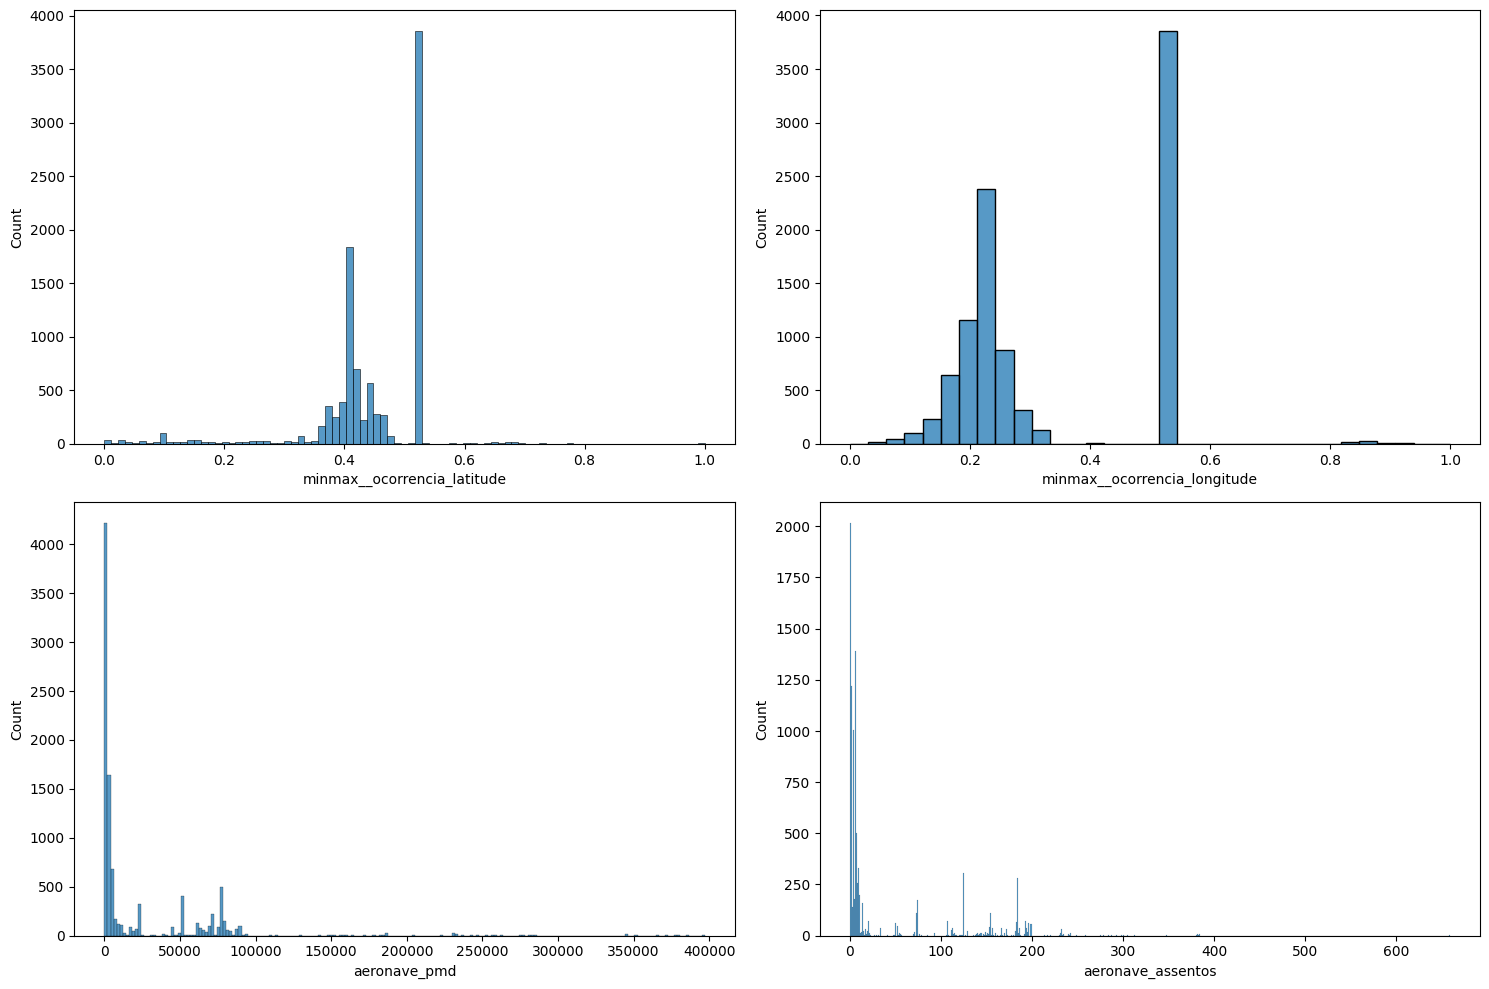

In [286]:
# plota histogramas de variáveis numéricas
colunas = ["minmax__ocorrencia_latitude", 
           "minmax__ocorrencia_longitude",   
           'aeronave_pmd',
           'aeronave_assentos',
           ]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), tight_layout=True)

for ax, feature in zip(axs.flatten(), colunas):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero_trans)

plt.show()

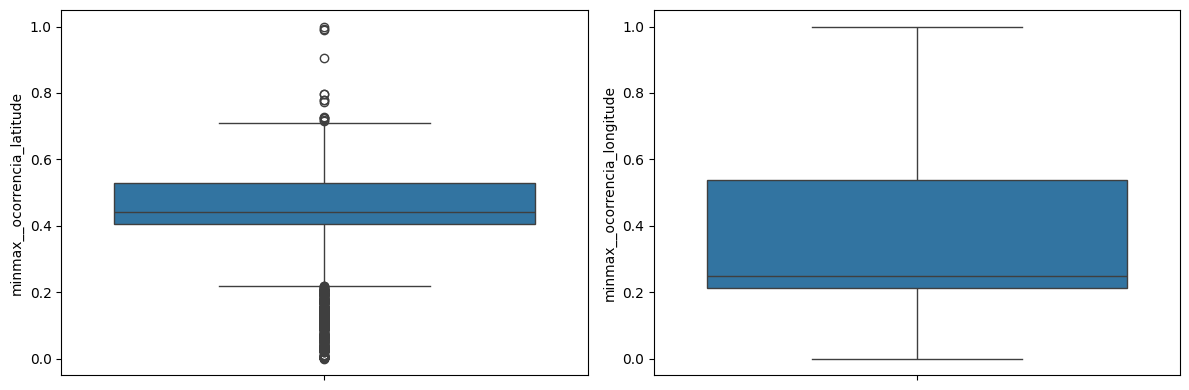

In [287]:
search_outliers = ["minmax__ocorrencia_latitude", 
                   "minmax__ocorrencia_longitude",                 
                    ]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [288]:
def retira_outliers(dfx, x):
    q75,q25 = np.percentile(dfx.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dfx.loc[dfx[x] < min,x] = np.nan
    dfx.loc[dfx[x] > max,x] = np.nan

    dfx = dfx.dropna(axis = 0)
            
    return dfx

In [289]:
# chama função para retirar outliers
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')

In [290]:
df_acidentes_aero_trans.shape

(9357, 63)

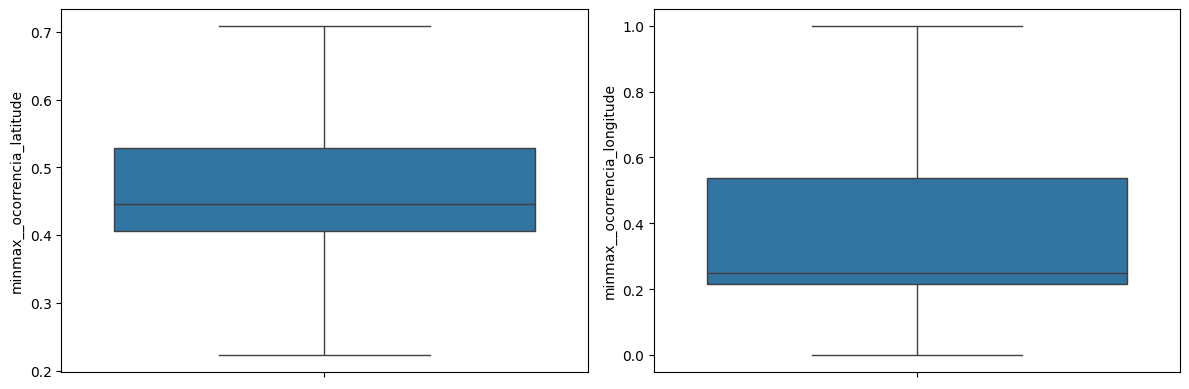

In [291]:
search_outliers = ["minmax__ocorrencia_latitude", "minmax__ocorrencia_longitude"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [292]:
print('skew latitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('kurtosis latitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('')
print('skew longitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))
print('kurtosis longitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))

skew latitude -0.16851893611167537
kurtosis latitude -0.14727111704816176

skew longitude 0.3495784340706966
kurtosis longitude -1.4491364551606796


In [293]:
df_acidentes_aero_trans_salvo = df_acidentes_aero_trans

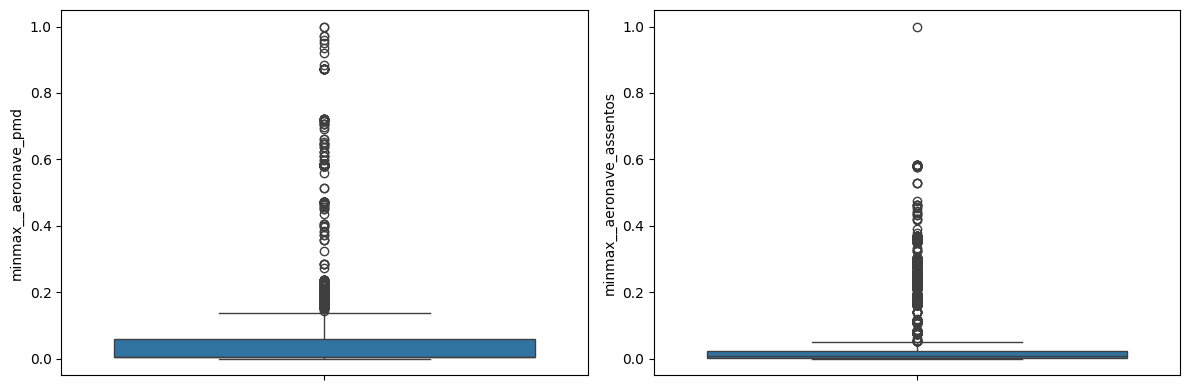

In [294]:
search_outliers = ["minmax__aeronave_pmd", 
                   "minmax__aeronave_assentos",                 
                    ]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [295]:
# chama função para retirar outliers
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_pmd')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_assentos')

In [296]:
df_acidentes_aero_trans.shape

(6574, 63)

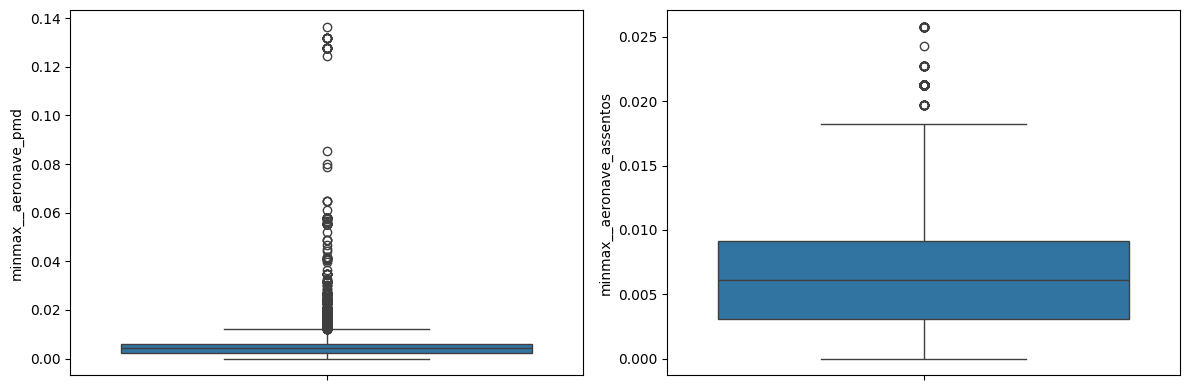

In [297]:
search_outliers = ["minmax__aeronave_pmd", "minmax__aeronave_assentos"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [298]:
print('skew aeronave_pmd', skew(df_acidentes_aero_trans['minmax__aeronave_pmd'], axis=0, bias=True))
print('kurtosis aeronave_pmd',kurtosis(df_acidentes_aero_trans['minmax__aeronave_pmd'], axis=0, bias=True))
print('')
print('skew aeronave_assentos', skew(df_acidentes_aero_trans['minmax__aeronave_assentos'], axis=0, bias=True))
print('kurtosis aeronave_assentos',kurtosis(df_acidentes_aero_trans['minmax__aeronave_assentos'], axis=0, bias=True))

skew aeronave_pmd 7.509643522134692
kurtosis aeronave_pmd 74.66990446935677

skew aeronave_assentos 0.910532476917329
kurtosis aeronave_assentos 0.6462966022828049


In [299]:
df_acidentes_aero_trans = df_acidentes_aero_trans_salvo.drop([
    'aeronave_pmd', 'aeronave_assentos', 'minmax__aeronave_pmd', 'minmax__aeronave_assentos'], axis=1)

In [300]:
df_acidentes_aero_trans.head(5)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901


In [301]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_acidentes_aero_trans.sort_index().to_csv('arquivos_tratados/df_acidentes_aero_trans.csv', index=False)